# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [121]:
# Importando as dependências externas
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

In [ ]:
# Criando o dataframe a partir dos dados em csv
ideb_original = pd.read_csv('ideb.csv')

# Novo dataframe com as colunas de interesse
ideb = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.6,2.3
1,2005,AC,49.3,151.8,149.6,1.8


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [ ]:
# Selecionando os dados de 2019
ideb_19 = ideb_1[ideb_1['ano'] == 2019]
ideb_19.head(2)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
8947,2019,AC,98.2,288.92,263.10,8.1
8948,2019,AC,96.5,254.78,231.63,6.8


In [ ]:
# Agrupando os dados por estado
ideb_19 = ideb_19.groupby(by='sigla_uf').mean()
ideb_19.reset_index(inplace=True)
ideb_19.head()

,sigla_uf,ano,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,2019.0,88.561184,245.253478,237.995942,4.671739
1,AL,2019.0,92.081591,237.883189,231.412708,4.509295
2,AM,2019.0,86.853550,223.121965,219.773218,4.032397
3,AP,2019.0,81.552252,217.216667,215.831111,3.694444
4,BA,2019.0,83.032948,233.942537,230.205596,4.034125


### Atividade 3: Padronize os dados.

In [ ]:
# Padronizando os dados do dataframe ideb_2019
ideb_19_scaled = ideb_19.copy()

# Retirando dados categóricos
ideb_19_scaled.drop(ideb_19_scaled[['sigla_uf', 'ano']], axis=1, inplace=True)

# Instanciando a função StandardScaler
scaler = StandardScaler()

# Padronizando os dados do dataframe
ideb_19_scaled[ideb_19_scaled.columns] = scaler.fit_transform(ideb_19_scaled)

# Reinserindo a coluna 'sigla_uf' com o nome 'uf'
ideb_19_scaled[['uf']] = ideb_19[['sigla_uf']]
ideb_19_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,uf
0,-0.025280,0.080727,-0.016434,0.092154,AC
1,0.801179,-0.437122,-0.531887,-0.201424,AL
2,-0.426168,-1.474271,-1.443233,-1.063297,AM
3,-1.670713,-1.889188,-1.751891,-1.674063,AP
4,-1.323101,-0.713999,-0.626401,-1.060175,BA


In [ ]:
# Gerando a matriz de correlações para definir as variáveis para o KMeans
ideb_19_scaled.corr() # Selecionadas as colunas 'taxa_aprovao' e 'ideb'

<ipython-input-42-9ff9a31d28fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ideb_19_scaled.corr()


,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
taxa_aprovacao,1.000000,0.694758,0.678749,0.810383
nota_saeb_matematica,0.694758,1.000000,0.991215,0.956512
nota_saeb_lingua_portuguesa,0.678749,0.991215,1.000000,0.938921
ideb,0.810383,0.956512,0.938921,1.000000


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

In [ ]:
#Criando lista vazia para armazenar as inércias
inercia = []

# Definindo os números de clusters para aplicar o método do cotovelo
kmin = 2
kmax = 10

# Criando laço de repetição para cálculo iterativo das inércias
for i in range(kmin, kmax+1):
  kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10) # Instanciando o KMeans
  kmeans.fit(ideb_19_scaled[['taxa_aprovacao', 'ideb']]) # Aplicando o KMeans para i clusters às colunas de interesse
  inercia.append(kmeans.inertia_) # Calculando a inércia de i clusters e adicionando à lista 'inercia'

print(inercia)

[19.611770193073262, 10.916462347693209, 7.350137180329911, 5.2636677217504095, 3.771923613572479, 2.9382545041746133, 2.6167623199035797, 2.2654182197219677, 1.9079003825177068]


<Axes: >

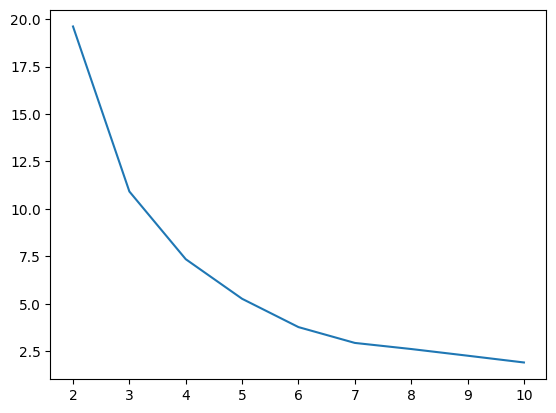

In [ ]:
# Gerando o gráfico de cotovelo
sns.lineplot(data='ideb_19_scaled', x=range(kmin, kmax+1), y=inercia) # O gráficp indica que o número ideal está entre 4 e 6 clusters

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

In [ ]:
#Criando lista vazia para armazenar os coeficientes de silhueta
silhueta = []

# Definindo os números de clusters
kmin = 2
kmax = 10

# Criando laço de repetição para cálculo iterativo dos coeficientes de silhueta
for i in range(kmin, kmax+1):
  kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10) # Instanciando o KMeans
  kmeans.fit(ideb_19_scaled[['taxa_aprovacao', 'ideb']]) # Aplicando o KMeans para i clusters às colunas de interesse
  silhueta.append(silhouette_score(ideb_19_scaled[['taxa_aprovacao', 'ideb']], kmeans.labels_, metric='euclidean'))

print(silhueta)

[0.4921158200800192, 0.43255804096508516, 0.4233536294111657, 0.4119734061089768, 0.4351475656505773, 0.43233283769210284, 0.40408649838482497, 0.3891986679435178, 0.3495566703516739]


<Axes: >

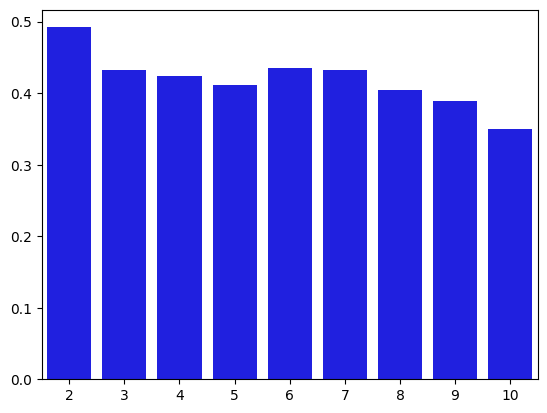

In [ ]:
# Gerando o gráfico de silhueta
n = [i for i in range(kmin, kmax+1)]
sns.barplot(x=n, y=silhueta, color='blue')

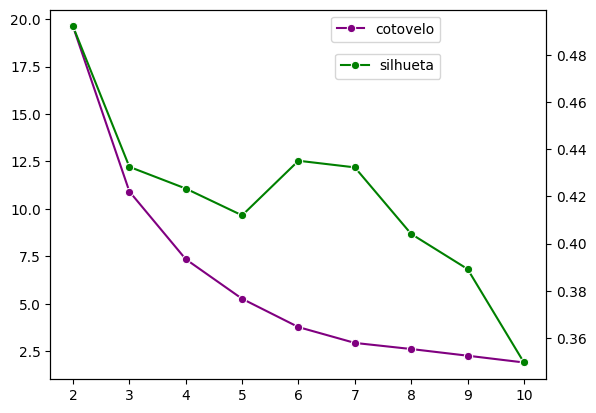

In [108]:
# Gerando gráfico de linhas sobrepostas, unindo os métodos do cotovelo e da silhueta
fig, ax = plt.subplots()
sns.lineplot(x=range(kmin,kmax+1), y=inercia, marker='o', color='purple')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(kmin,kmax+1), y=silhueta, marker='o', color='green')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [ ]:
# Definido k=6

# Instanciando o KMeans
kmeans_ideal = KMeans(n_clusters=6, random_state=42)

# Aplicando o KMeans às colunas de interesse
kmeans_ideal.fit(ideb_19_scaled[['taxa_aprovacao', 'ideb']])

# Visualizando os labels, que identificam os clusters
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 5, 3, 1, 1, 2, 4, 4, 2, 5, 4, 0, 0, 1, 3, 5, 0, 2, 0, 1, 4, 3,
       4, 4, 1, 2, 5], dtype=int32)

In [ ]:
# Inserindo os labels como nova coluna do dataframe
ideb_19_scaled['cluster'] = kmeans.labels_
ideb_19_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,uf,cluster
0,-0.025280,0.080727,-0.016434,0.092154,AC,0
1,0.801179,-0.437122,-0.531887,-0.201424,AL,5
2,-0.426168,-1.474271,-1.443233,-1.063297,AM,3
3,-1.670713,-1.889188,-1.751891,-1.674063,AP,1
4,-1.323101,-0.713999,-0.626401,-1.060175,BA,1


### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

<Axes: xlabel='taxa_aprovacao', ylabel='ideb'>

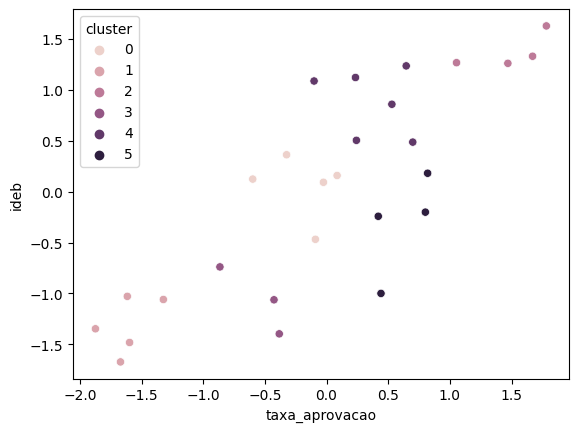

In [ ]:
# Gerando gráfico de dispersão
sns.scatterplot(data= ideb_19_scaled, x= ideb_19_scaled['taxa_aprovacao'], y= ideb_19_scaled['ideb'], hue= ideb_19_scaled['cluster'])

### Atividade 8: Quais são os estados de cada grupo?

In [ ]:
# Listando os estados por grupo utilizando laços de repetição
for cluster in range(0,6):
  lista_clusters = []
  for i in range(len(ideb_19_scaled['uf'])):
    if ideb_19_scaled['cluster'][i] == cluster:
      lista_clusters.append(ideb_19_scaled['uf'][i])
  print('Cluster', cluster,': ', lista_clusters)

Cluster 0 :  ['AC', 'MS', 'MT', 'PI', 'RJ']
Cluster 1 :  ['AP', 'BA', 'PA', 'RN', 'SE']
Cluster 2 :  ['CE', 'GO', 'PR', 'SP']
Cluster 3 :  ['AM', 'PB', 'RR']
Cluster 4 :  ['DF', 'ES', 'MG', 'RO', 'RS', 'SC']
Cluster 5 :  ['AL', 'MA', 'PE', 'TO']


### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

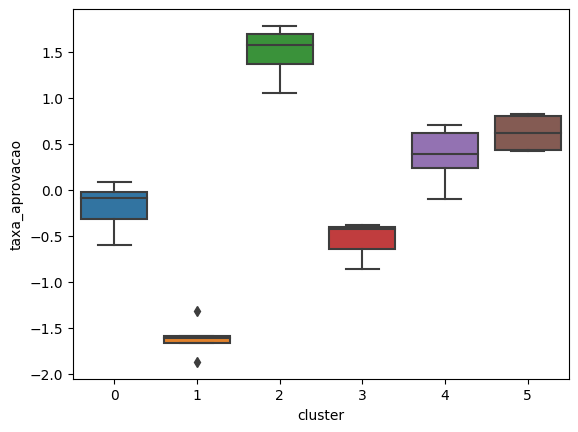

In [ ]:
# Gerando o boxplot para a variável taxa de aprovação
sns.boxplot(data= ideb_19_scaled, x= 'cluster', y='taxa_aprovacao');

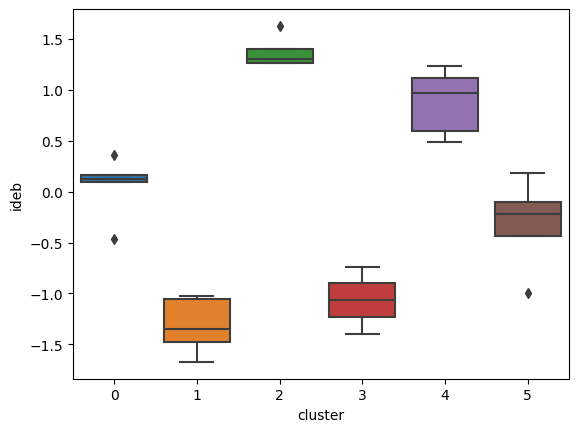

In [ ]:
# Gerando o boxplot para a variável ideb
sns.boxplot(data= ideb_19_scaled, x= 'cluster', y= 'ideb');

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [ ]:
# Aplicando a ANOVA para testar as hipóteses abaixo
# H0: clusters não são distintos
# H1: clusters são distintos

# Criando dataframes para cada cluster
clusters = []
for i in range(6):
    cluster = ideb_19_scaled[ideb_19_scaled['cluster'] == i][['taxa_aprovacao', 'ideb']]
    clusters.append(cluster)

# Calculando a ANOVA
fvalue, pvalue = stats.f_oneway(*clusters)

# Apresentando os resultados
print('Valor F: ', fvalue, ' | Valor P: ', pvalue)

# O resultado da ANOVA indica, para ambas as variáveis sob análise, valores F altos e valores P baixos, muito inferiores a 5%
# Dessa forma, pode-se rejeitar H0 e concluir que os grupos são de fato estatisticamente distintos

Valor F:  [70.65088719 46.04565627]  | Valor P:  [2.05101040e-12 1.29433949e-10]


### Atividade 11: Faça a clusterização com outro valor para k.

In [ ]:
# Aplicando KMeans para k=4

# Instanciando o KMeans
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Aplicando o KMeans às colunas de interesse
kmeans_4.fit(ideb_19_scaled[['taxa_aprovacao', 'ideb']])

# Visualizando os labels, que identificam os clusters
kmeans_4.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 1, 1, 3, 0, 3, 3, 2, 0, 0, 0, 1, 2, 0, 2, 3, 0, 1, 0, 2,
       0, 0, 1, 3, 0], dtype=int32)

In [ ]:
# Criando novo dataframe como uma cópia do ideb_19_scaled
ideb_19_scaled_copy = ideb_19_scaled.copy()

# Atribuindo as novas identificações de cluster para cada uf
ideb_19_scaled_copy['cluster'] = kmeans_4.labels_
ideb_19_scaled_copy.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,uf,cluster
0,-0.025280,0.080727,-0.016434,0.092154,AC,0
1,0.801179,-0.437122,-0.531887,-0.201424,AL,0
2,-0.426168,-1.474271,-1.443233,-1.063297,AM,2
3,-1.670713,-1.889188,-1.751891,-1.674063,AP,1
4,-1.323101,-0.713999,-0.626401,-1.060175,BA,1


<Axes: xlabel='taxa_aprovacao', ylabel='ideb'>

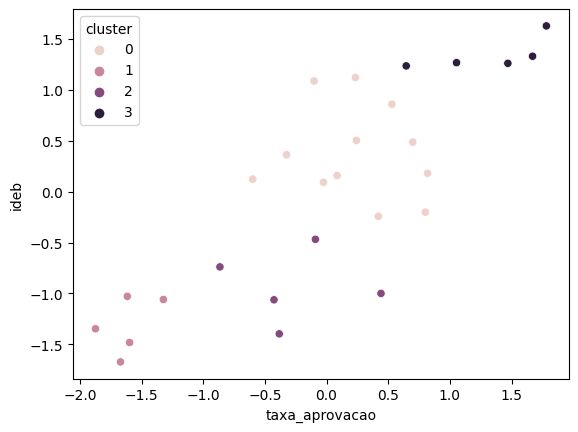

In [ ]:
# Gerando o novo gráfico de dispersão
sns.scatterplot(data=ideb_19_scaled_copy, x='taxa_aprovacao', y='ideb', hue='cluster')

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

In [116]:
# Calculando o número ótimo de clusters

# Abaixo, aplicou-se o código utilizado no exercício anterior do módulo para confirmar a conclusão de forma definitiva
def numero_otimo_clusters(kmin, kmax):
    inercia = []

    for i in range(kmin,kmax+1):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(ideb_19_scaled[['taxa_aprovacao','ideb']])
        inercia.append(kmeans.inertia_)
    
    x0, y0 = kmin, inercia[0]
    x1, y1 = kmax, inercia[len(inercia)-1]

    distancias = []
    for i in range(len(inercia)):
        x = i+kmin
        y = inercia[i]
        numerador = abs( (y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0 )
        denominador = math.sqrt( (y1 - y0)**2 + (x1 - x0)**2 )
        distancias.append(numerador/denominador)
    return distancias.index(max(distancias)) + 2

# calculando a quantidade ótima de clusters
k_otimo = numero_otimo_clusters(2,10)

print('Número ótimo de clusters: ' + str(k_otimo))

Número ótimo de clusters: 4


### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

In [124]:
# Aplicando o KMeans com 3 variáveis e k=4

# Criando variável 'dimensoes' para simplificar o código
dimensoes = ideb_19_scaled[['taxa_aprovacao', 'ideb', 'nota_saeb_matematica']]

# Instanciando o algoritmo KMeans
kmeans_3d = KMeans(n_clusters=4, random_state=42)

# Aplicando o KMeans às colunas de interesse
kmeans_3d.fit(dimensoes)

# Visualizando os labels, que identificam os clusters
kmeans_3d.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 0, 0, 0, 2, 1, 2, 2, 3, 1, 1, 3, 0, 0, 3, 3, 2, 1, 0, 1, 0,
       1, 1, 0, 2, 3], dtype=int32)

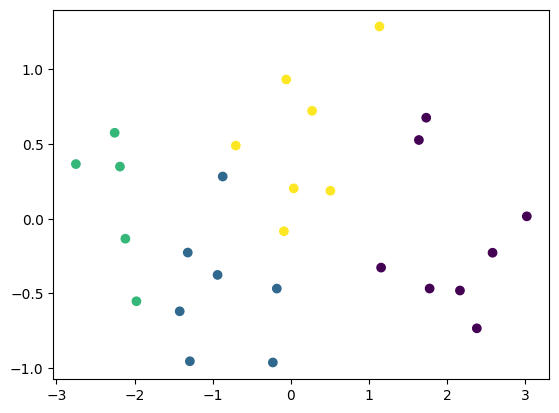

In [125]:
# Criando novo dataframe e incluindo os rótulos dos clusters
ideb_pca = ideb_19_scaled.copy()
ideb_pca['cluster'] = kmeans_3d.labels_


#Aplicando PCA

# Reduzindo a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dimensoes)

# Gerando gráfico de dispersão dos componentes PCA, colorindo os pontos pelos rótulos de cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ideb_pca['cluster'])
plt.show()
